In [1]:
%matplotlib inline


# K-means Clustering

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid).

K-means falls under the class of algorithms known as unsupervised learning.

The code shown below implements the K-means algorithm on the Iris dataset.

* The first plot display the ground truth.
* The second plot displays what a K-means algorithm would yield using eight clusters. 
* The third plot displays what a K-means algorithm would yield using three clusters. 
* The fourth plot shows what the effect of a bad initialization is on the classification process (by setting n_init to only 1 (default is 10), the amount of times that the algorithm will be run with different centroid seeds is reduced).



Automatically created module for IPython interactive environment


/Users/motani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


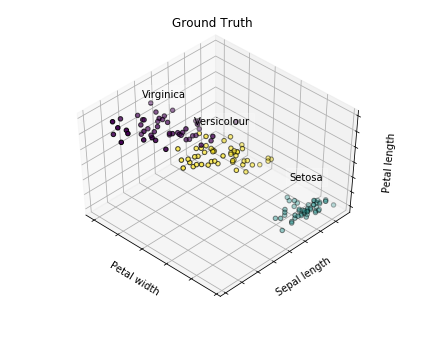

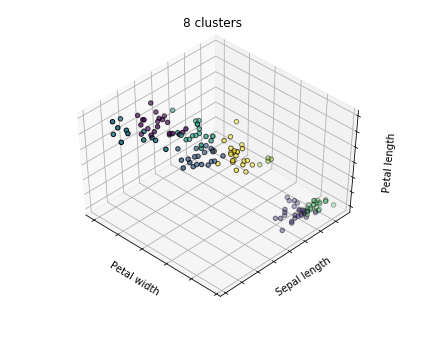

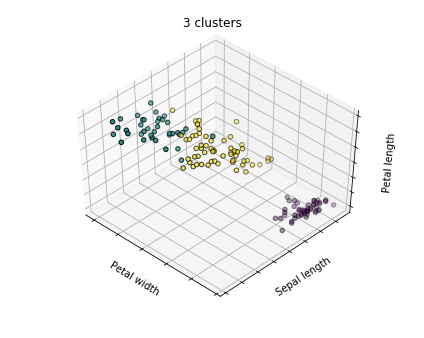

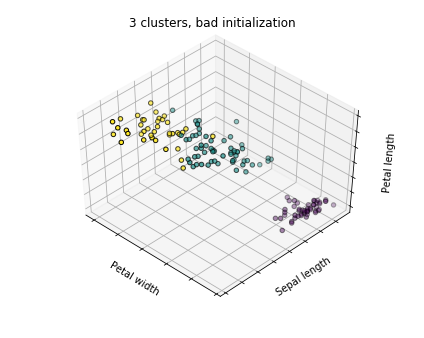

In [8]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

## Instantiate the K-Means classifier
estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]


## Plot the ground truth
fig = plt.figure(fignum, figsize=(6, 4.5))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12
fig.show()

## Plot the K-means results
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(6, 4.5))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1



### So how does the K-means clustering algorithm work?

Given a dataset with 'n' observations.

Given an initial set of 'k' means m1(1),...,mk(1), the algorithm proceeds by alternating between two steps:

Step 1: Assignment step
* Assign each observation to the cluster with the nearest mean: that with the <u>least squared Euclidean distance</u>. Mathematically, this means partitioning the observations according to the Voronoi diagram generated by the means.

Step 2: Update step: 
* Recalculate means (centroids) for observations assigned to each cluster.

The algorithm has converged when the assignments no longer change. The algorithm does not guarantee to find the optimum solution.




<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/K-means_convergence.gif/440px-K-means_convergence.gif" width="400" align="center">


